# ====================Customer Churn Dataset=====================
## -----------------------------------------Domain - Telecommunication-------------------------------------------
### Dataset - Click here to download the dataset:https://drive.google.com/file/d/1Wp2ioU0gHFyFEA2NJ10-IjzmMCsUbWEe/view
#### The data set includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents.

# ----------------------------------Business Understanding--------------------------------------
The telecommunications sector has become one of the main industries in developed countries. The technical progress and the increasing number of operators raised the level of competition. Companies are working hard to survive in this competitive market depending on multiple strategies. Three main strategies have been proposed to generate more revenues:

-    1.Acquire new customers
-    2.Upsell the existing customers
-    3.Increase the retention period of customers

However, comparing these strategies taking the value of return on investment (RoI) of each into account has shown that the third strategy is the most profitable strategy, proving that retaining an existing customer costs much lower than acquiring a new one, in addition to being considered much easier than the upselling strategy. To apply the third strategy, companies have to decrease the potential of customer’s churn, known as "the customer movement from one provider to another".

Customer churn is a considerable concern in service sectors with high competitive services. On the other hand, predicting the customers who are likely to leave the company will represent a potentially large additional revenue source if it is done in the early phase.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.

Customer Churn is one of the most important and challenging problems for businesses such as Credit Card companies, cable service providers, SASS and telecommunication companies worldwide. Even though it is not the most fun to look at, customer churn metrics can help businesses improve customer retention.

## ------------------------------------------Problem Statement ------------------------------------------------------
- Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. ,   predict if the customer will churn or not.
### Task - Prepare the Data and build a model to predict the churn of a customer.

### Importing Required Libraries

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Step - 1: Load the data

In [50]:
ch=pd.read_csv(r'C:\Users\User\Downloads\churn_dataset.csv')
ch.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
"""Skimpy is a Python library that helps you explore and analyze data quickly. 
It has tools for cleaning, transforming, and visualizing data. 
Whether you're working with small or large datasets, Skimpy can help you gain insights fast."""
skim(ch)

NameError: name 'skim' is not defined

In [52]:
## drop the customerid column
ch.drop("customerID",axis=1,inplace=True)

## Typeconversion

In [53]:

## Replace empty spaces in TotalCharges column with NaN values
ch["TotalCharges"] = ch["TotalCharges"].replace(" ", np.NaN)
## Convert TotalCharges column to float data type
ch["TotalCharges"] = ch["TotalCharges"].astype("float")

In [54]:
# Code to count the number of missing values in the 'TotalCharges' column of a pandas dataframe
ch["TotalCharges"].isna().sum()

11

- Here we see that the TotalCharges has 11 missing values. Let's check this data.


In [55]:
# Filter rows where 'TotalCharges' is NaN
ch[ch["TotalCharges"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


- It can also be noted that the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.

In [56]:
# Drop rows with missing values in the "TotalCharges" column
ch = ch.dropna(subset=["TotalCharges"], axis=0)

# Display the updated dataframe
ch


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


- Let's delete the rows with null values in TotalCharges columns since there are only 11 rows and deleting them will not affect the data.

In [57]:
# Select columns with numeric data type
num = ch.select_dtypes(include="number")

# Select columns with object data type
cat = ch.select_dtypes(include="object")


In [58]:
num

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


### checking outliers

In [59]:
# Function to identify outliers in a pandas dataframe
def outliers(data):
    # Iterate over each numerical column in the dataframe
    for col in data.select_dtypes(include="number"):
        # Calculate the quartiles and interquartile range (IQR) for the column
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 - q1
        # Calculate the lower and upper bounds for the column using the IQR method
        lb = q1 - (1.5 * iqr)
        ub = q3 + (1.5 * iqr)
        # Identify any observations that fall outside the bounds and list them as outliers
        olr = list(data[(data[col] >= ub) | (data[col] <= lb)][col])
        # Print the number of outliers for the column
        print(f"Number of outliers in column '{col}': {len(olr)}")
        
# Example usage of the function with a dataframe 'df'
outliers(ch)


Number of outliers in column 'SeniorCitizen': 7032
Number of outliers in column 'tenure': 0
Number of outliers in column 'MonthlyCharges': 0
Number of outliers in column 'TotalCharges': 0


In [60]:
# check the seniorcitizen column sum
ch["SeniorCitizen"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

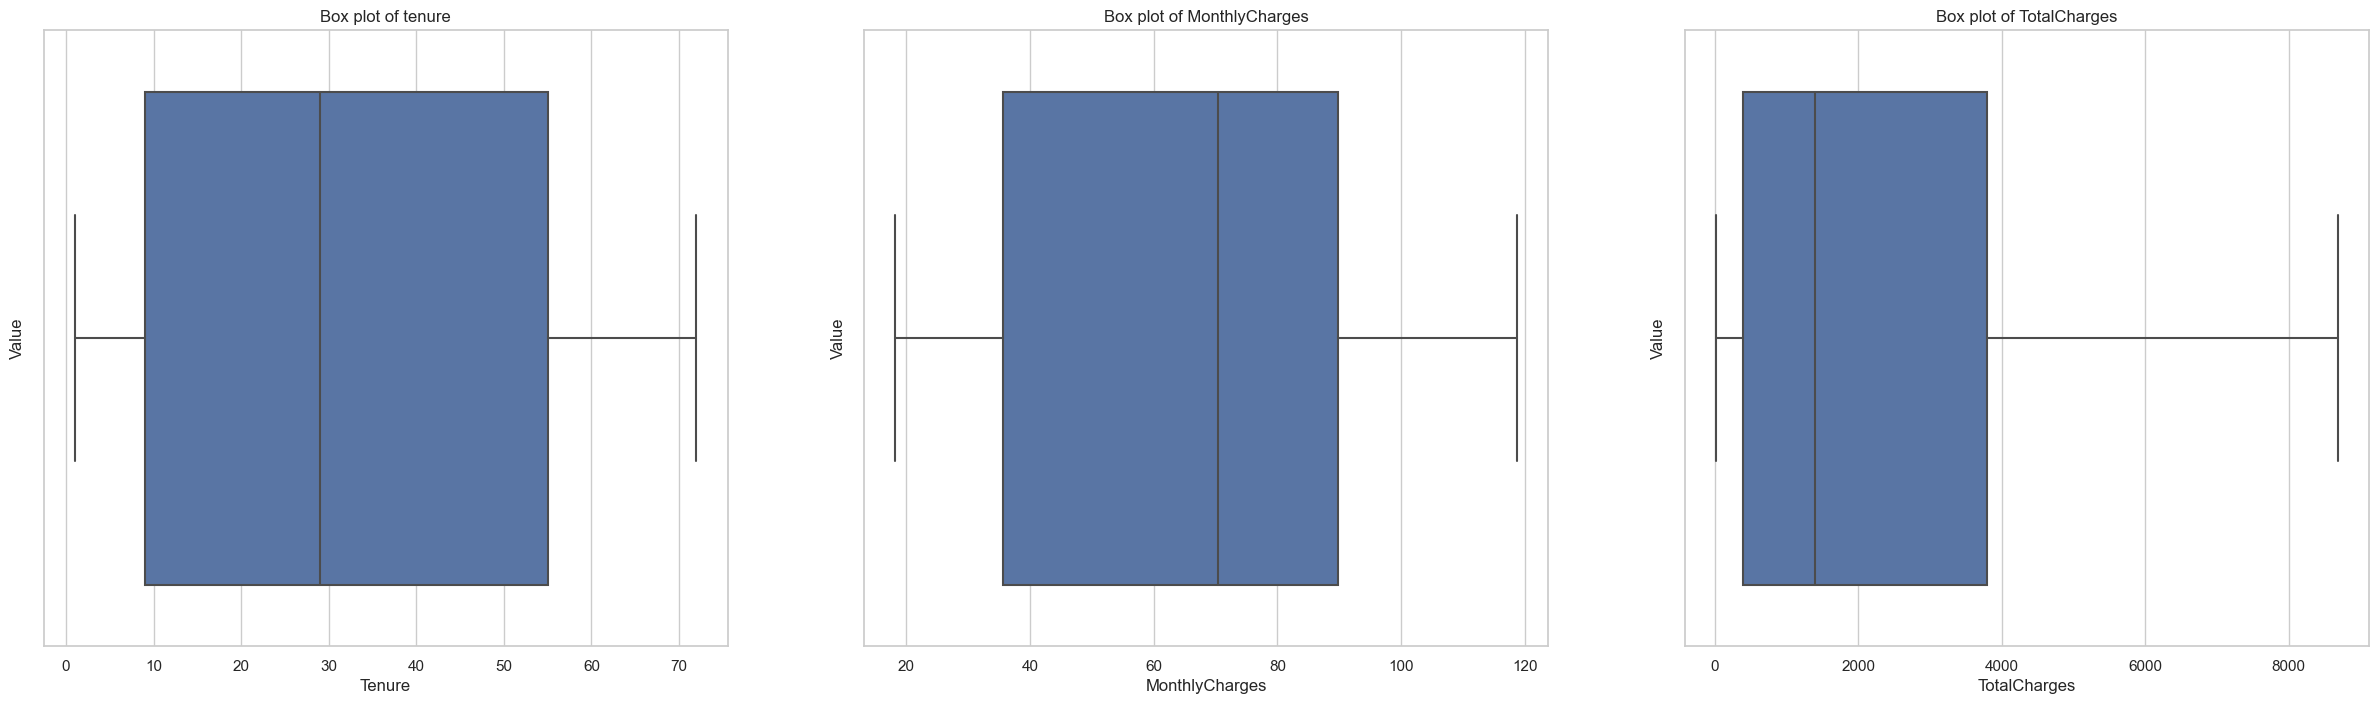

In [61]:

# Create a boxplot of the "tenure" column
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(30, 8))
sns.boxplot(x=ch["tenure"], ax=axes[0])
axes[0].set_title("Box plot of tenure")
axes[0].set_xlabel("Tenure")
axes[0].set_ylabel("Value")

# Create a boxplot of the "MonthlyCharges" column
sns.boxplot(x=ch["MonthlyCharges"], ax=axes[1])
axes[1].set_title("Box plot of MonthlyCharges")
axes[1].set_xlabel("MonthlyCharges")
axes[1].set_ylabel("Value")

# Create a boxplot of the "TotalCharges" column
sns.boxplot(x=ch["TotalCharges"], ax=axes[2])
axes[2].set_title("Box plot of TotalCharges")
axes[2].set_xlabel("TotalCharges")
axes[2].set_ylabel("Value")

plt.show()


- The boxplots representing the variables of tenure, monthly charges, and total charges do not contain any outliers.

# Step - 2: Document the below mentioned points properly: 
- The input variables:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges']
- Target variable:'churn'
- Identify the type of ML:'supervisedlearning(target lable know)'
- Task: 'classification'.
- Identify the Evaluation Metric.
- For classification task - Accuracy


In [62]:
ch.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).


In [63]:
# Divide the dataset into train and test. 
# Target: churn (output)
from sklearn.model_selection import train_test_split

In [64]:
# train_test_split => shuffles the data first, then it will split the data into train and test. 
X_train, X_test, Y_train, Y_test = train_test_split(ch.drop('Churn', axis=1),\
                                                   ch['Churn'], test_size=0.25,random_state=42)

In [65]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5274, 19) (5274,)
(1758, 19) (1758,)


## Step - 4: Data preparation on train data:
### For Numerical Variables - Standardization  (Fit and Transform)
### For Categorical -  OneHotEncoding 


In [66]:
# Select columns with numeric data type from X_train
X_train_trns_num = X_train.select_dtypes(include="number")

# Select columns with object data type from X_train
X_train_trns_cat = X_train.select_dtypes(include="object")

X_train_trns_num.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [67]:
from sklearn.preprocessing import StandardScaler
# Instantiate StandardScaler object
sc = StandardScaler()

# Standardize numeric columns in X_train
X_train_num_ch = pd.DataFrame(sc.fit_transform(X_train_trns_num), 
                              index=X_train_trns_num.index,
                              columns=X_train_trns_num.columns)

# Display standardized dataframe
X_train_num_ch

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3166,-0.437716,-0.748175,-0.526380,-0.712154
4333,-0.437716,-0.056016,0.858262,0.290305
1927,-0.437716,0.595428,1.415436,1.259067
2315,-0.437716,0.106845,0.291139,0.171422
858,-0.437716,1.369017,0.806856,1.604076
...,...,...,...,...
3778,-0.437716,-1.196043,-0.473316,-0.945428
5199,-0.437716,0.758289,1.553071,1.517630
5235,-0.437716,-0.951752,0.546510,-0.659030
5399,-0.437716,0.717573,-1.489826,-0.568491


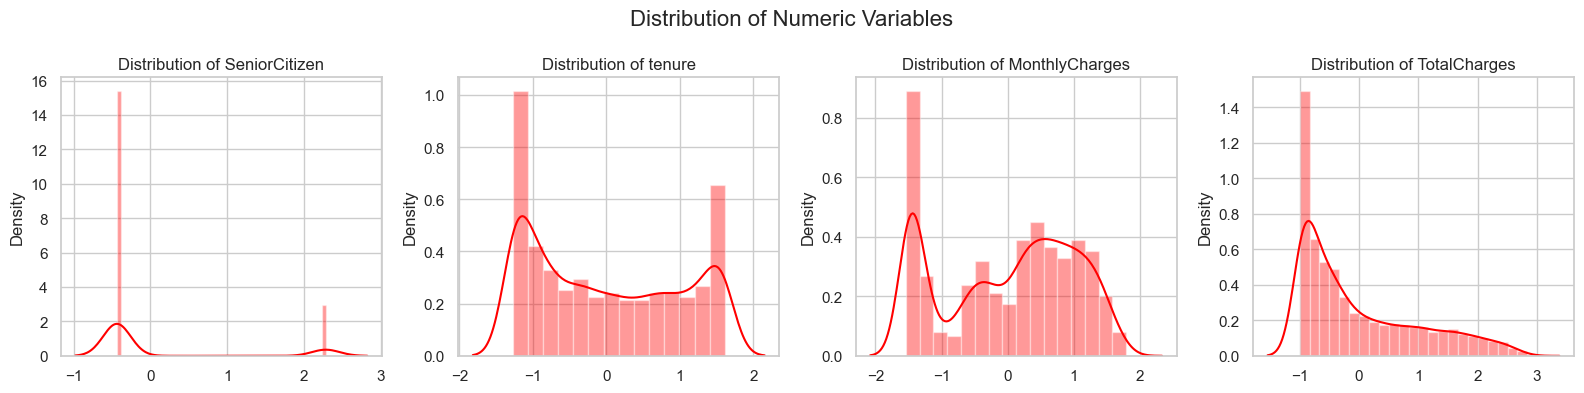

In [68]:
# Get the names of the numeric columns
numeric_cols = X_train_num_ch.columns

# Set the figure size and create subplots with a single row and multiple columns
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(16, 4))

# Loop through each numeric column and plot a distribution on a separate subplot
for i, col in enumerate(numeric_cols):
    sns.distplot(X_train_num_ch[col], color="red", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(None)
    
# Add a title to the figure and adjust the layout
fig.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()


In [69]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder object
oe = OneHotEncoder(drop='first', sparse=False)

# One-hot encode object columns in X_train
X_train_obj_ch = pd.DataFrame(oe.fit_transform(X_train_trns_cat), 
                              index=X_train_trns_cat.index,
                              columns=oe.get_feature_names_out(X_train_trns_cat.columns))

# Display one-hot encoded dataframe
X_train_obj_ch


,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3166,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1927,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2315,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
858,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5199,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5235,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5399,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
# Combine standardized numeric and one-hot encoded object columns in X_train
X_train_p_ch = X_train_num_ch.merge(X_train_obj_ch, left_index=True, right_index=True)

# Display the preprocessed dataframe
X_train_p_ch


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3166,-0.437716,-0.748175,-0.526380,-0.712154,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4333,-0.437716,-0.056016,0.858262,0.290305,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1927,-0.437716,0.595428,1.415436,1.259067,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2315,-0.437716,0.106845,0.291139,0.171422,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
858,-0.437716,1.369017,0.806856,1.604076,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778,-0.437716,-1.196043,-0.473316,-0.945428,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5199,-0.437716,0.758289,1.553071,1.517630,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
5235,-0.437716,-0.951752,0.546510,-0.659030,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5399,-0.437716,0.717573,-1.489826,-0.568491,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical -  OneHotEncoding


In [71]:
# Select columns with numeric data type from X_test
X_test_trns_num=X_test.select_dtypes(include="number")
# Select columns with object data type from X_test
X_test_trns_cat=X_test.select_dtypes(include="object")

In [72]:
# Instantiate StandardScaler object
sc = StandardScaler()
# Standardize numeric columns in X_test
X_test_num_ch = pd.DataFrame(sc.fit_transform(X_test_trns_num), 
                             index=X_test_trns_num.index,
                             columns=X_test_trns_num.columns)
# Display standardized dataframe
X_test_num_ch

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
2481,2.231500,1.161255,-1.344898,-0.354348
6784,-0.448129,-0.553662,-1.354940,-0.807359
6125,-0.448129,-0.798650,1.240910,-0.416775
3052,-0.448129,0.181302,-0.339027,-0.123011
4099,-0.448129,-1.084469,-1.195942,-0.940477
...,...,...,...,...
6103,-0.448129,-0.676156,-1.520633,-0.882117
6187,-0.448129,-1.002807,-1.507244,-0.938705
110,-0.448129,0.916267,1.056808,1.279949
3048,-0.448129,-1.247795,-0.693844,-0.974915


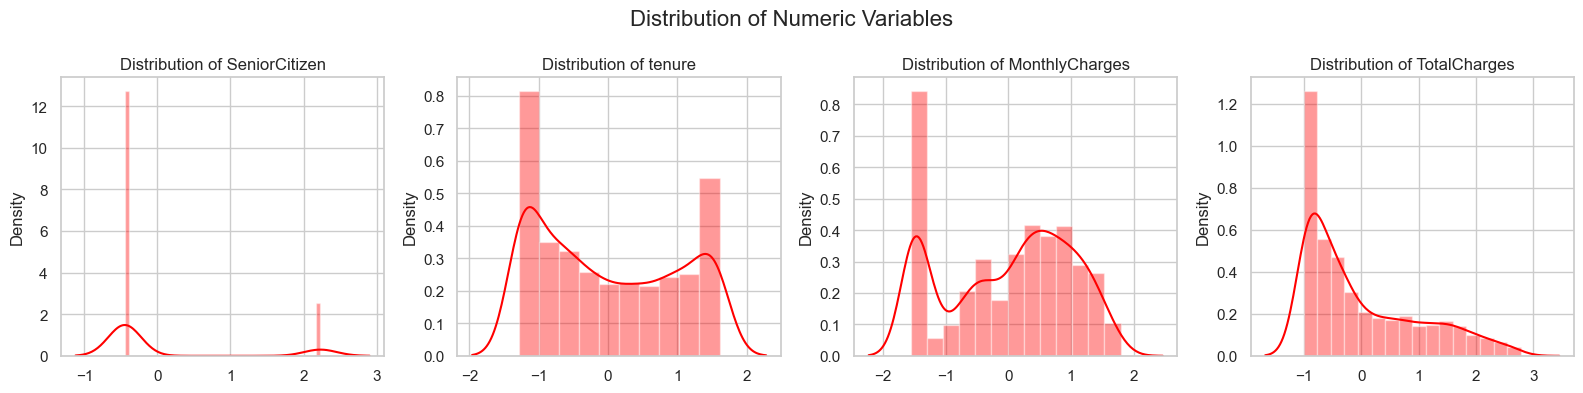

In [73]:
# Get the names of the numeric columns
numeric_cols = X_test_num_ch.columns

# Set the figure size and create subplots with a single row and multiple columns
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(16, 4))

# Loop through each numeric column and plot a distribution on a separate subplot
for i, col in enumerate(numeric_cols):
    sns.distplot(X_test_num_ch[col], color="red", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(None)
    
# Add a title to the figure and adjust the layout
fig.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()


In [74]:
# One-hot encode object columns in X_test
X_test_obj_ch = pd.DataFrame(oe.fit_transform(X_test_trns_cat), index=X_test_trns_cat.index,\
            columns=oe.get_feature_names_out(X_test_trns_cat.columns))
# Display one-hot encoded dataframe
X_test_obj_ch

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2481,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6784,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6125,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3052,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4099,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6103,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6187,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
110,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3048,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
# Combine standardized numeric and one-hot encoded object columns in X_test
X_test_p_ch = X_test_num_ch.merge(X_test_obj_ch, left_index=True, right_index=True)
# Display the preprocessed dataframe
X_test_p_ch.shape

(1758, 30)

### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest


### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy_score(actual, predict)

In [76]:
# Initialize empty lists to store algorithm names and corresponding accuracies
algorithm = []
accuracy = []



### LogisticRegression

In [77]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Instantiate Logistic Regression object
lr = LogisticRegression()

# Append algorithm name to list
algorithm.append("LogisticRegression")

# Fit Logistic Regression model on preprocessed training data
lr.fit(X_train_p_ch, Y_train)

# Predict on preprocessed test data
y_pred = lr.predict(X_test_p_ch)

# Calculate accuracy and append to list
a = accuracy_score(Y_test, y_pred)
accuracy.append(a)

# Print accuracy score and classification report
print("Accuracy_score of LogisticRegression:", a)
print(classification_report(Y_test, y_pred))



Accuracy_score of LogisticRegression: 0.7895335608646189
              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1300
         Yes       0.61      0.52      0.56       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



In [78]:
# Create a confusion matrix of actual vs predicted labels
confusion_matrix = pd.crosstab(Y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
# Display the confusion matrix
confusion_matrix


Predicted,No,Yes,All
Actual,,,
No,1151,149,1300
Yes,221,237,458
All,1372,386,1758


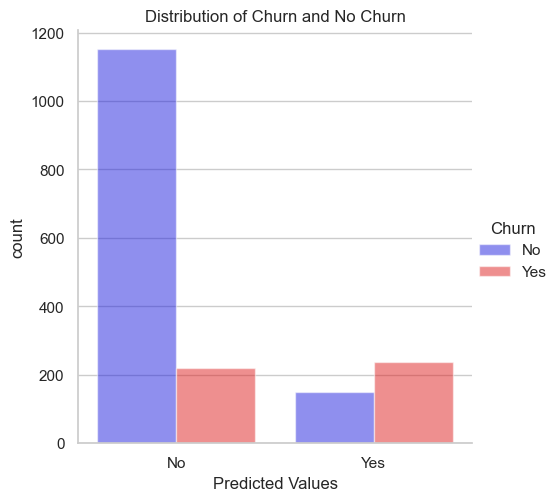

In [79]:
# Create a DataFrame with the predicted values and true values
df1 = pd.DataFrame({'y_pred': y_pred, 'Churn': Y_test})

# Create a categorical plot using catplot()
sns.catplot(data=df1, x='y_pred', hue='Churn', kind='count', palette=['blue', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()


### DecisionTreeClassifier

In [80]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report

# Instantiate Decision Tree Classifier object
dt = DecisionTreeClassifier()

# Append algorithm name to list
algorithm.append("DecisionTreeClassifier")

# Fit Decision Tree Classifier model on preprocessed training data
dt.fit(X_train_p_ch, Y_train)

# Predict on preprocessed test data
y_pred_dt = dt.predict(X_test_p_ch)

# Calculate accuracy and append to list
b = accuracy_score(Y_test, y_pred_dt)
accuracy.append(b)

# Print accuracy score and classification report
print("Accuracy_score of DecisionTreeClassifier:", b)
print(classification_report(Y_test, y_pred_dt))


Accuracy_score of DecisionTreeClassifier: 0.7207053469852105
              precision    recall  f1-score   support

          No       0.82      0.80      0.81      1300
         Yes       0.47      0.50      0.48       458

    accuracy                           0.72      1758
   macro avg       0.64      0.65      0.65      1758
weighted avg       0.73      0.72      0.72      1758



In [81]:
# Create a confusion matrix of actual vs predicted labels
confusion_matrix = pd.crosstab(Y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Display the confusion matrix
confusion_matrix


Predicted,No,Yes,All
Actual,,,
No,1037,263,1300
Yes,228,230,458
All,1265,493,1758


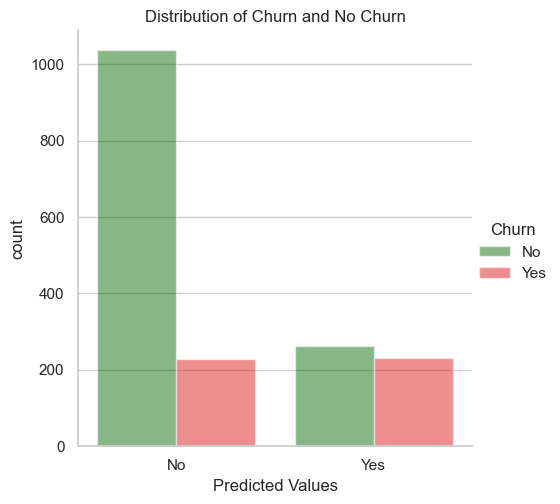

In [82]:
# Create a DataFrame with the predicted values and true values
df2 = pd.DataFrame({'y_pred_dt': y_pred_dt, 'Churn': Y_test})

# Create a categorical plot using catplot()
sns.catplot(data=df2, x='y_pred_dt', hue='Churn', kind='count', palette=['green', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()


### RandomForestClassifier

In [83]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier


# Instantiate Random Forest Classifier object
rf = RandomForestClassifier()

# Append algorithm name to list
algorithm.append("RandomForestClassifier")

# Fit Random Forest Classifier model on preprocessed training data
rf.fit(X_train_p_ch, Y_train)

# Predict on preprocessed test data
y_pred_rf = rf.predict(X_test_p_ch)

# Calculate accuracy and append to list
c = accuracy_score(Y_test, y_pred_rf)
accuracy.append(c)

# Print accuracy score and classification report
print("Accuracy_score of RandomForestClassifier:", c)
print(classification_report(Y_test, y_pred_rf))


Accuracy_score of RandomForestClassifier: 0.7810011376564278
              precision    recall  f1-score   support

          No       0.82      0.89      0.86      1300
         Yes       0.61      0.46      0.52       458

    accuracy                           0.78      1758
   macro avg       0.71      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [84]:
# Create a confusion matrix of actual vs predicted labels
confusion_matrix = pd.crosstab(Y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Display the confusion matrix
confusion_matrix


Predicted,No,Yes,All
Actual,,,
No,1163,137,1300
Yes,248,210,458
All,1411,347,1758


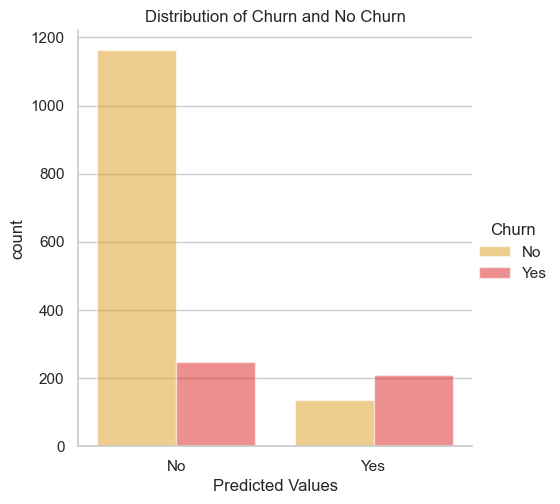

In [85]:
# Create a DataFrame with the predicted values and true values
df3 = pd.DataFrame({'y_pred_rf': y_pred_rf, 'Churn': Y_test})

# Create a categorical plot using catplot()
sns.catplot(data=df3, x='y_pred_rf', hue='Churn', kind='count', palette=['orange', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()


### KNeighborsClassifier

In [86]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighbors Classifier object
knr = KNeighborsClassifier()

# Append algorithm name to list
algorithm.append("KNeighborsClassifier")

# Fit KNeighbors Classifier model on preprocessed training data
knr.fit(X_train_p_ch, Y_train)

# Predict on preprocessed test data
y_pred_knr = knr.predict(X_test_p_ch)

# Calculate accuracy and append to list
d = accuracy_score(Y_test, y_pred_knr)
accuracy.append(d)

# Print accuracy score and classification report
print("Accuracy_score of KNeighborsClassifier:", d)
print(classification_report(Y_test, y_pred_knr))


Accuracy_score of KNeighborsClassifier: 0.7525597269624573
              precision    recall  f1-score   support

          No       0.83      0.84      0.83      1300
         Yes       0.53      0.51      0.52       458

    accuracy                           0.75      1758
   macro avg       0.68      0.68      0.68      1758
weighted avg       0.75      0.75      0.75      1758



In [87]:
# Create a confusion matrix of actual vs predicted labels
confusion_matrix = pd.crosstab(Y_test, y_pred_knr, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Display the confusion matrix
confusion_matrix


Predicted,No,Yes,All
Actual,,,
No,1088,212,1300
Yes,223,235,458
All,1311,447,1758


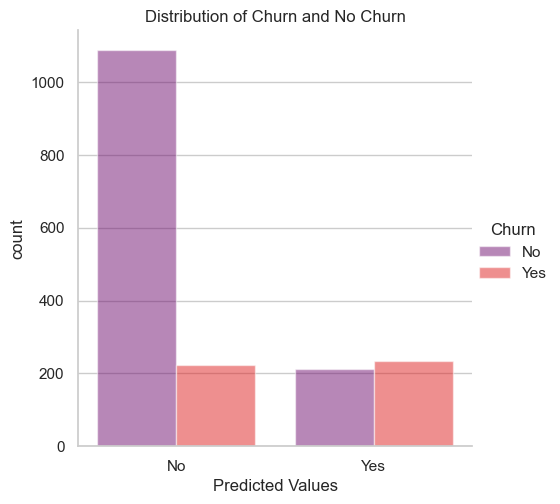

In [88]:
# Create a DataFrame with the predicted values and true values
df4 = pd.DataFrame({'y_pred_knr': y_pred_knr, 'Churn': Y_test})

# Create a categorical plot using catplot()
sns.catplot(data=df4, x='y_pred_knr', hue='Churn', kind='count', palette=['purple', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()


### Support Vector Machines Classifier

In [89]:
# Import necessary libraries
from sklearn.svm import SVC

# Instantiate Support Vector Machines Classifier object
sv = SVC()

# Append algorithm name to list
algorithm.append("SupportVectorMachinesClassifier")

# Fit Support Vector Machines Classifier model on preprocessed training data
sv.fit(X_train_p_ch, Y_train)

# Predict on preprocessed test data
y_pred_sv = sv.predict(X_test_p_ch)

# Calculate accuracy and append to list
e = accuracy_score(Y_test, y_pred_sv)
accuracy.append(e)

# Print accuracy score and classification report
print("Accuracy_score of SupportVectorMachinesClassifier:", e)
print(classification_report(Y_test, y_pred_sv))


Accuracy_score of SupportVectorMachinesClassifier: 0.7952218430034129
              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1300
         Yes       0.65      0.47      0.54       458

    accuracy                           0.80      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.80      0.78      1758



In [90]:
# Create a confusion matrix of actual vs predicted labels
confusion_matrix = pd.crosstab(Y_test, y_pred_sv, rownames=['Actual'], colnames=['Predicted'], margins=True)

# Display the confusion matrix
confusion_matrix


Predicted,No,Yes,All
Actual,,,
No,1183,117,1300
Yes,243,215,458
All,1426,332,1758


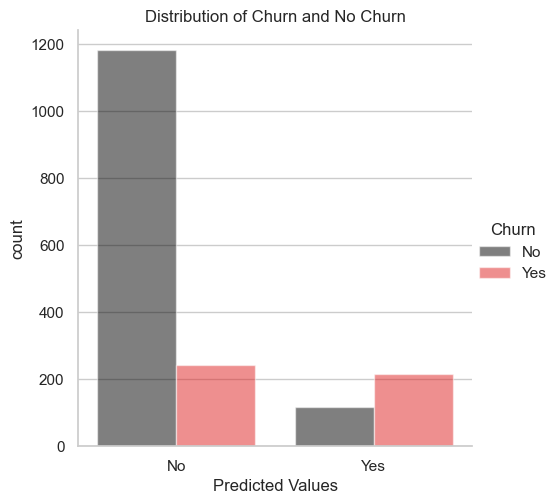

In [91]:
# Create a DataFrame with the predicted values and true values
df = pd.DataFrame({'y_pred_sv': y_pred_sv, 'Churn': Y_test})

# Create a categorical plot using catplot()
sns.catplot(data=df, x='y_pred_sv', hue='Churn', kind='count', palette=['black', 'red'], alpha=0.5)

# Set the title and x-axis label
plt.title('Distribution of Churn and No Churn')
plt.xlabel('Predicted Values')

# Display the plot
plt.show()



### Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Churn Prediction.


In [92]:
# Create a DataFrame to store algorithm names and corresponding accuracies
fp = pd.DataFrame({"Algorithm": algorithm, "Accuracy": accuracy})

# Print the DataFrame
fp




,Algorithm,Accuracy
0,LogisticRegression,0.789534
1,DecisionTreeClassifier,0.720705
2,RandomForestClassifier,0.781001
3,KNeighborsClassifier,0.752560
4,SupportVectorMachinesClassifier,0.795222


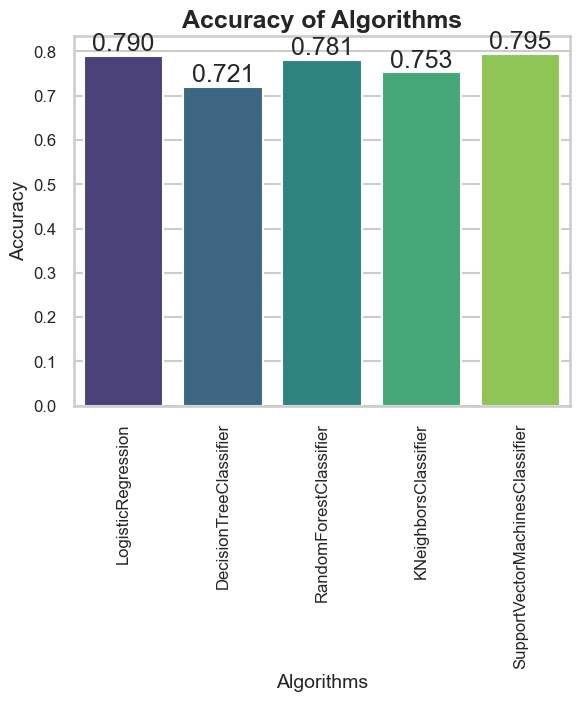

In [93]:
# Set the style and context for Seaborn plot
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the bar plot using Seaborn
ax = sns.barplot(data=fp, x="Algorithm", y="Accuracy", palette="viridis")

# Set the title, xlabel, ylabel, and font sizes
ax.set_title("Accuracy of Algorithms", fontsize=18, fontweight='bold')
ax.set_xlabel("Algorithms", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)
for i,v in enumerate(fp["Accuracy"]):
    plt.text(i,v,f"{v:.3f}",ha="center",va="bottom")
# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Set the font size of the tick labels
ax.tick_params(axis='both', labelsize=12)

# Display the plot
plt.show()


# Observations and conclusion's :

- Based on the accuracy scores obtained, we can observe that the best performing classifier is the Support Vector Machines (SVM) Classifier with an accuracy score of 0.795.

- The Logistic Regression and Random Forest Classifier also performed reasonably well with accuracy scores of 0.789 and 0.782 respectively.

- The Decision Tree Classifier and K-Nearest Neighbors Classifier had lower accuracy scores of 0.700 and 0.752 respectively.

- Therefore, based on the given dataset and the evaluation metrics used, we can conclude that the Support Vector Machines Classifier is the best model for this problem.






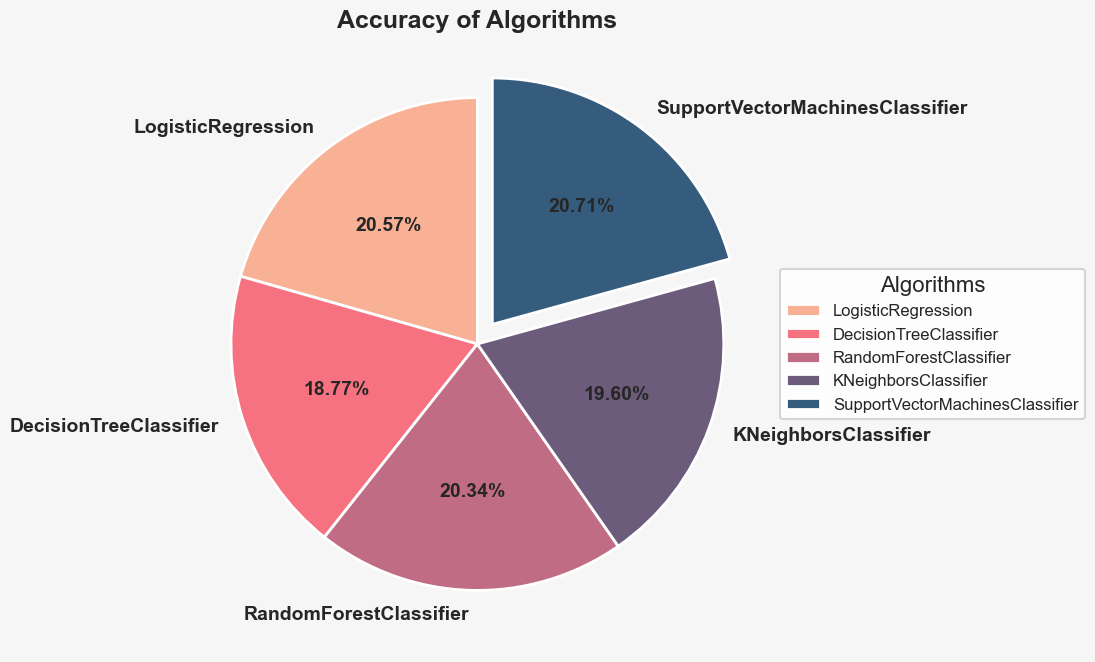

In [94]:

# Define the data for the pie chart
algos = fp['Algorithm']
accs = fp['Accuracy']

# Define the colors for the pie chart
colors = ['#f8b195', '#f67280', '#c06c84', '#6c5b7b', '#355c7d']

# Find the index of the highest value in the accs array
highest_index = np.argmax(accs)

# Create a list of zeros with the same length as the accs array
explode = [0] * len(accs)

# Set the value of the highest wedge in the explode list to 0.1
explode[highest_index] = 0.1

# Create a figure and axis object using plt.subplots()
fig, ax = plt.subplots(figsize=(8, 8))

# Create the pie chart using ax.pie()
wedges, labels, autopct = ax.pie(accs, colors=colors, labels=algos, autopct='%1.2f%%', startangle=90, explode=explode)

# Set the properties of the text in the pie chart
plt.setp(labels, fontsize=14, fontweight='bold')
plt.setp(autopct, fontsize=14, fontweight='bold')

# Set the properties of the wedges in the pie chart
for wedge in wedges:
    wedge.set_edgecolor('white')
    wedge.set_linewidth(2)

# Add a title and legend to the plot
ax.set_title('Accuracy of Algorithms', fontsize=18, fontweight='bold')
ax.legend(wedges, algos, title='Algorithms', fontsize=12, title_fontsize=16, loc='center right', bbox_to_anchor=(1, 0, 0.5, 1))

# Add a background color to the plot
fig.patch.set_facecolor('#f6f6f6')

# Show the plot
plt.show()


# SPRINT 2 - Exploratory Data Analysis

## Problem Statement :
- Given various features about a customer like Gender, SeniorCitizen, Partner, Dependents etc.. , predict if the customer will churn or not.

### Task:
- This is an open ended question. Kindly apply all your knowledge to perform an exploratory data analysis on the given dataset. It is known that the target variable is Churn.

- Write proper conclusions and provide recommendations to the telecom company based on the insights.


In [95]:
ch

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [96]:
ch.dropna(inplace=True)

In [97]:
ch.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
ch["SeniorCitizen"]=ch["SeniorCitizen"].map({0:"No",1:"Yes"})


In [99]:
ch["TotalCharges"]= pd.to_numeric(ch.TotalCharges, errors='coerce')


In [100]:
# Drop rows with missing values in the "TotalCharges" column
ch = ch.dropna(subset=["TotalCharges"], axis=0)

# Display the updated dataframe
ch


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# UNIVARIATE ANALYSIS 

# Single numerical

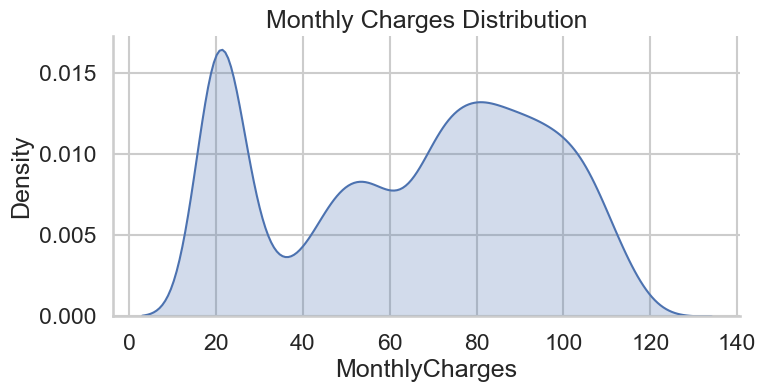

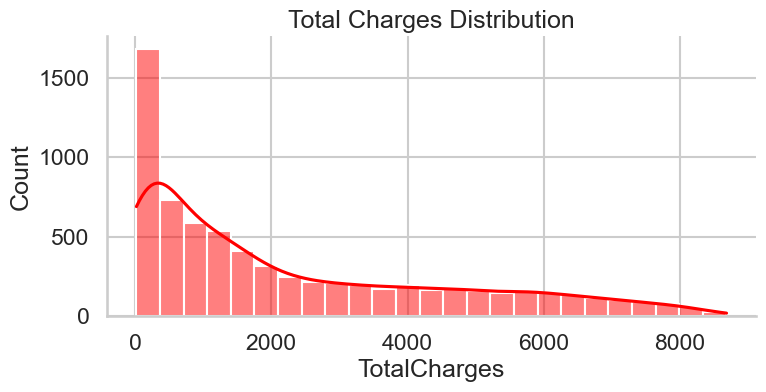

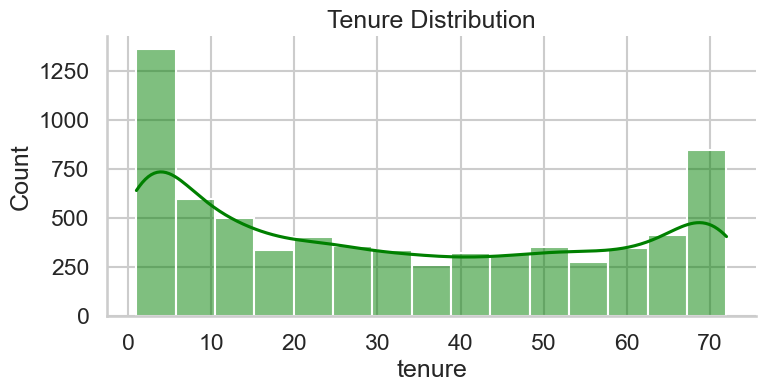

In [101]:
import seaborn as sns

# Create a FacetGrid to display the distributions of the numerical variables
grid = sns.FacetGrid(ch, aspect=2, height=4)

# Add a KDE plot of MonthlyCharges
grid.map(sns.kdeplot, 'MonthlyCharges', shade=True)
grid.axes[0][0].set_title('Monthly Charges Distribution')

# Show the plot
plt.show()

# Create a new FacetGrid for TotalCharges
grid = sns.FacetGrid(ch, aspect=2, height=4)

# Add a histogram plot of TotalCharges with a KDE overlay
grid.map(sns.histplot, 'TotalCharges', kde=True, color='red')
grid.axes[0][0].set_title('Total Charges Distribution')

# Show the plot
plt.show()

# Create a new FacetGrid for tenure
grid = sns.FacetGrid(ch, aspect=2, height=4)

# Add a histogram plot of tenure with a KDE overlay
grid.map(sns.histplot, 'tenure', kde=True, color='green')
grid.axes[0][0].set_title('Tenure Distribution')

# Show the plot
plt.show()


# Observation:
- The first plot displays the distribution of MonthlyCharges. It shows that the data is somewhat bimodal, with peaks around 20-30 and 70-100. There is also a large spike around 20. The plot is shaded, making it easy to see the density of the data.

- The second plot displays the distribution of TotalCharges. It shows that the data is skewed to the right, with a large spike around 0. The plot includes a KDE overlay, which provides a smoother view of the data.

- The third plot displays the distribution of tenure. It shows that the data is somewhat uniform, with a peak around 0-5 and a small bump around 70. The plot also includes a KDE overlay, which shows the density of the data.

# Single categorical

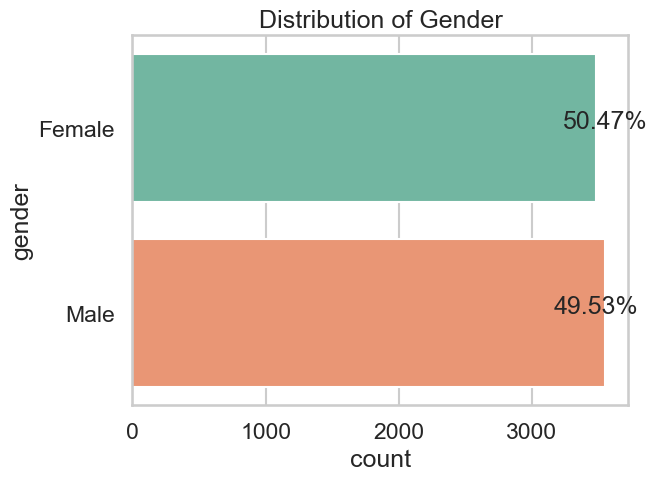

In [102]:
sns.set_style("whitegrid")
sns.set_context("talk")

# Create the countplot
ax = sns.countplot(y=ch["gender"], palette="Set2")

# Add percentage labels to each bar
total = float(len(ch["gender"]))
for i, value in enumerate(ch["gender"].value_counts()):
    ax.text(value + 1, i, f"{(value/total)*100:.2f}%", ha="center")

# Add a title to the plot
plt.title("Distribution of Gender")

# Show the plot
plt.show()


- The countplot of gender reveals that males make up the majority at 50.5%, while females make up 49.5% of the total count.

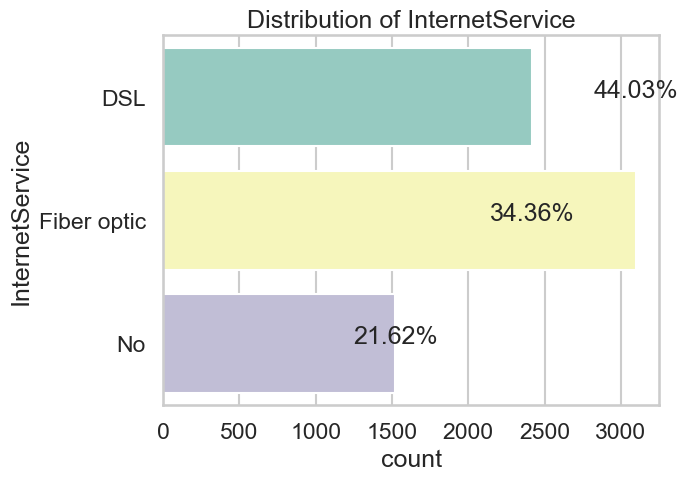

In [103]:
# Create the countplot
ax = sns.countplot(y=ch["InternetService"],palette="Set3")

# Add percentage labels to each bar
total = float(len(ch["InternetService"]))
for i, value in enumerate(ch["InternetService"].value_counts()):
    ax.text(value + 1, i, f"{(value/total)*100:.2f}%", ha="center")

# Add a title to the plot
plt.title("Distribution of InternetService")

# Show the plot
plt.show()


- The countplot of interentservice reveals that "fiberoptic" make up the majority at 44.0 %, while "DSL" make up 34.4% and "NO" make up 21.6%  of the total count.

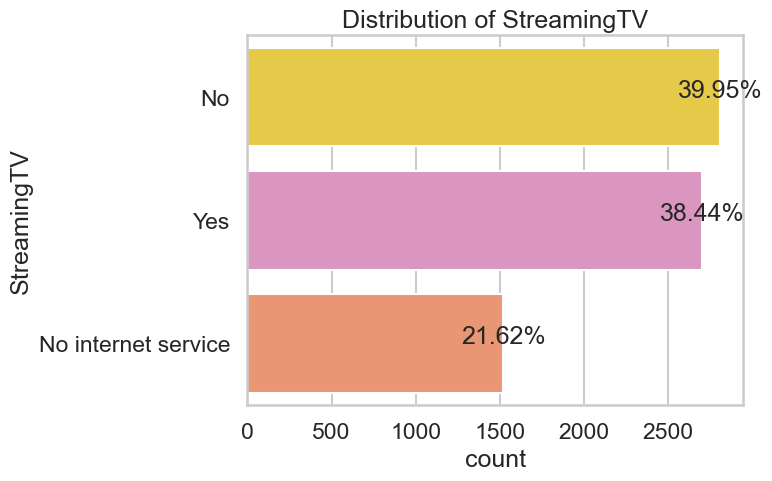

In [104]:
# Create the countplot
ax = sns.countplot(y=ch["StreamingTV"],palette="Set2_r")

# Add percentage labels to each bar
total = float(len(ch["StreamingTV"]))
for i, value in enumerate(ch["StreamingTV"].value_counts()):
    ax.text(value + 1, i, f"{(value/total)*100:.2f}%", ha="center")

# Add a title to the plot
plt.title("Distribution of StreamingTV")

# Show the plot
plt.show()

- The countplot of interentservice reveals that "NO" make up the majority at 39.9% %, while "yes" make up 38.4% and "NO internetservices" make up 21.6% of the total count.

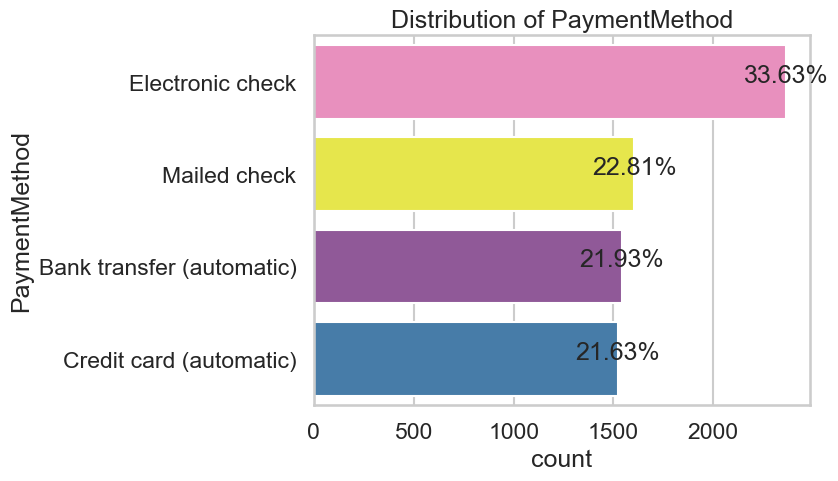

In [105]:
# Create the countplot
ax = sns.countplot(y=ch["PaymentMethod"],palette="Set1_r")



# Add percentage labels to each bar
total = float(len(ch["PaymentMethod"]))

for i, value in enumerate(ch["PaymentMethod"].value_counts()):
    ax.text(value + 1, i, f"{(value/total)*100:.2f}%", ha="center")
# Add a title to the plot
plt.title("Distribution of PaymentMethod")

# Show the plot
plt.show()


- The countplot of interentservice reveals that "Electronic check" make up the majority at 33.6 %, while "Mailed check " make up 22.8 % ,"Bank transfer " make up 21.9%  and "Credit card" make up 21.6% of the total count.

In [106]:
ch["Contract"].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

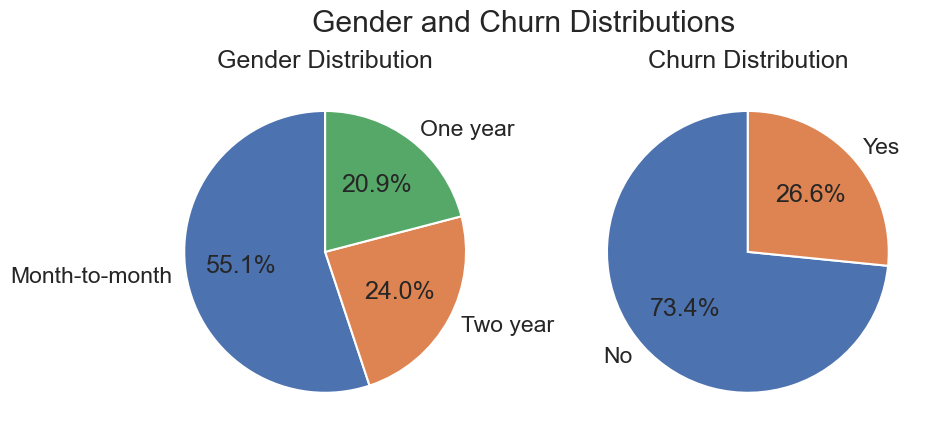

In [107]:

# Define labels and values for the pie chart
g_labels = ['Month-to-month', 'Two year','One year']
c_labels = ['No', 'Yes']
g_values = ch['Contract'].value_counts().values
c_values = ch['Churn'].value_counts().values

# Create a subplot with two pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the first pie chart (Gender)
axes[0].pie(g_values, labels=g_labels, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Gender Distribution')

# Plot the second pie chart (Churn)
axes[1].pie(c_values, labels=c_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Churn Distribution')

# Add a title for the entire subplot
plt.suptitle('Gender and Churn Distributions')

# Show the pie charts
plt.show()



In [108]:
cat.columns 

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

# BIVARIATE ANALYSIS

## CATEGORICAL VS NUMERICAL

In [ ]:
# Create swarm plots of monthly charges vs churn and total charges vs churn
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.swarmplot(x='Churn', y='MonthlyCharges', data=ch, ax=axes[0])
sns.swarmplot(x='Churn', y='TotalCharges', data=ch, ax=axes[1])
sns.swarmplot(x='Churn', y='tenure', data=ch, ax=axes[2])
axes[0].set_title('Monthly Charges vs Churn')
axes[1].set_title('Total Charges vs Churn')
axes[2].set_title('Tenure vs Churn')
plt.show()


# Observations:
- For Monthly Charges vs Churn, the swarmplot shows that customers who churned were more likely to have higher monthly charges compared to customers who did not churn.

- For Total Charges vs Churn, the swarmplot shows that customers who churned were more likely to have lower total charges compared to customers who did not churn.

- For Tenure vs Churn, the swarmplot shows that customers who did not churn were more likely to have a longer tenure compared to customers who churned.

In [ ]:
# Define the list of categorical variables
cat_vars = ["SeniorCitizen", "gender", "InternetService", "StreamingTV", "Contract", "PaymentMethod"]
num_vars = ["TotalCharges", "MonthlyCharges", "tenure"]

# Create subplots for each categorical variable and numerical variable
fig, axes = plt.subplots(len(cat_vars), len(num_vars), figsize=(18, 30))

for i, cat_var in enumerate(cat_vars):
    for j, num_var in enumerate(num_vars):
        # Create a bar plot for the current combination of categorical and numerical variable
        sns.barplot(x=cat_var, y=num_var, hue="Churn", data=ch, ax=axes[i, j])
        axes[i, j].set_title(cat_var + " vs " + num_var + " by Churn")
        axes[i, j].legend(title="Churn", loc="upper right")
        axes[i, j].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()



# Observations:

- SeniorCitizens tend to have higher TotalCharges compared to non-SeniorCitizens. But there is no significant difference in MonthlyCharges or tenure between SeniorCitizens and non-SeniorCitizens.
- Gender doesn't seem to have a significant effect on churn or any of the numerical variables.
- Customers with Fiber optic InternetService tend to have higher MonthlyCharges compared to those with DSL or no InternetService. They also have a slightly higher churn rate.
- Customers who have StreamingTV tend to have higher TotalCharges and MonthlyCharges. But having StreamingTV doesn't seem to have a significant effect on churn.
- Customers with a shorter Contract (Month-to-Month) tend to have higher MonthlyCharges and churn more compared to those with longer contracts (One year, Two year).
- Customers who pay by Electronic check tend to have higher churn compared to other PaymentMethods. There is no significant difference in numerical variables based on PaymentMethod.

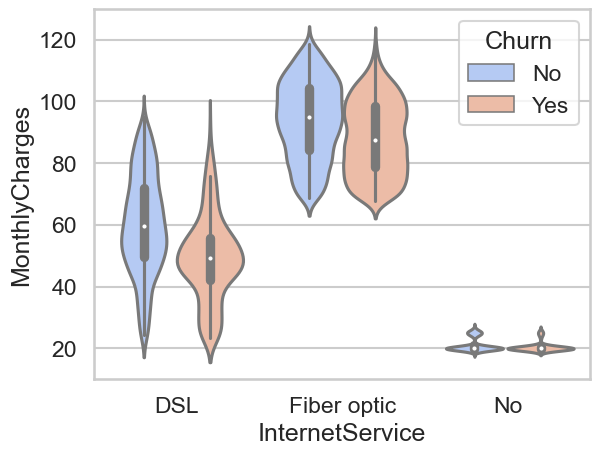

In [63]:
# Create a violinplot to visualize the relationship between MonthlyCharges and InternetService type
sns.violinplot(data=ch, x='InternetService', y='MonthlyCharges', hue='Churn', palette='coolwarm')
plt.show()


# Observations:

- The highest median MonthlyCharges are for customers with Fiber optic InternetService.
- Customers with no InternetService have the lowest MonthlyCharges.
- The spread of MonthlyCharges is wider for Fiber optic and DSL customers compared to those with no InternetService.
- Churned customers generally have higher MonthlyCharges across all categories of InternetService.
- For customers with Fiber optic and DSL InternetService, the distribution of MonthlyCharges is bimodal, with peaks at around 70 and 90 for Fiber optic and around 50 and 75 for DSL.





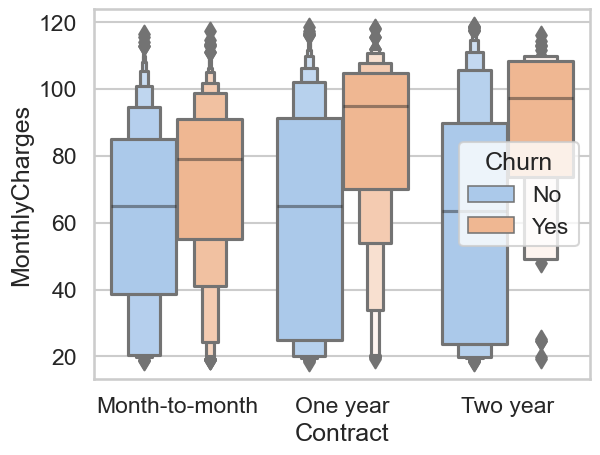

In [64]:
# Create a boxenplot to visualize the relationship between MonthlyCharges and Contract type
sns.boxenplot(data=ch, x='Contract', y='MonthlyCharges', hue='Churn', palette='pastel')
plt.show()


# Observations:

- Customers on Month-to-month contracts have higher MonthlyCharges on average compared to customers on One year or Two year contracts.
- For all Contract types, customers who churned had higher MonthlyCharges compared to customers who didn't churn.
- There are more outliers in the Month-to-month contract group, suggesting that this group has more variability in MonthlyCharges.
- Customers on Two year contracts have the smallest range of MonthlyCharges, indicating that there is less variation in the MonthlyCharges for this group.

 # CATEGORICAL VS CATEGORICAL

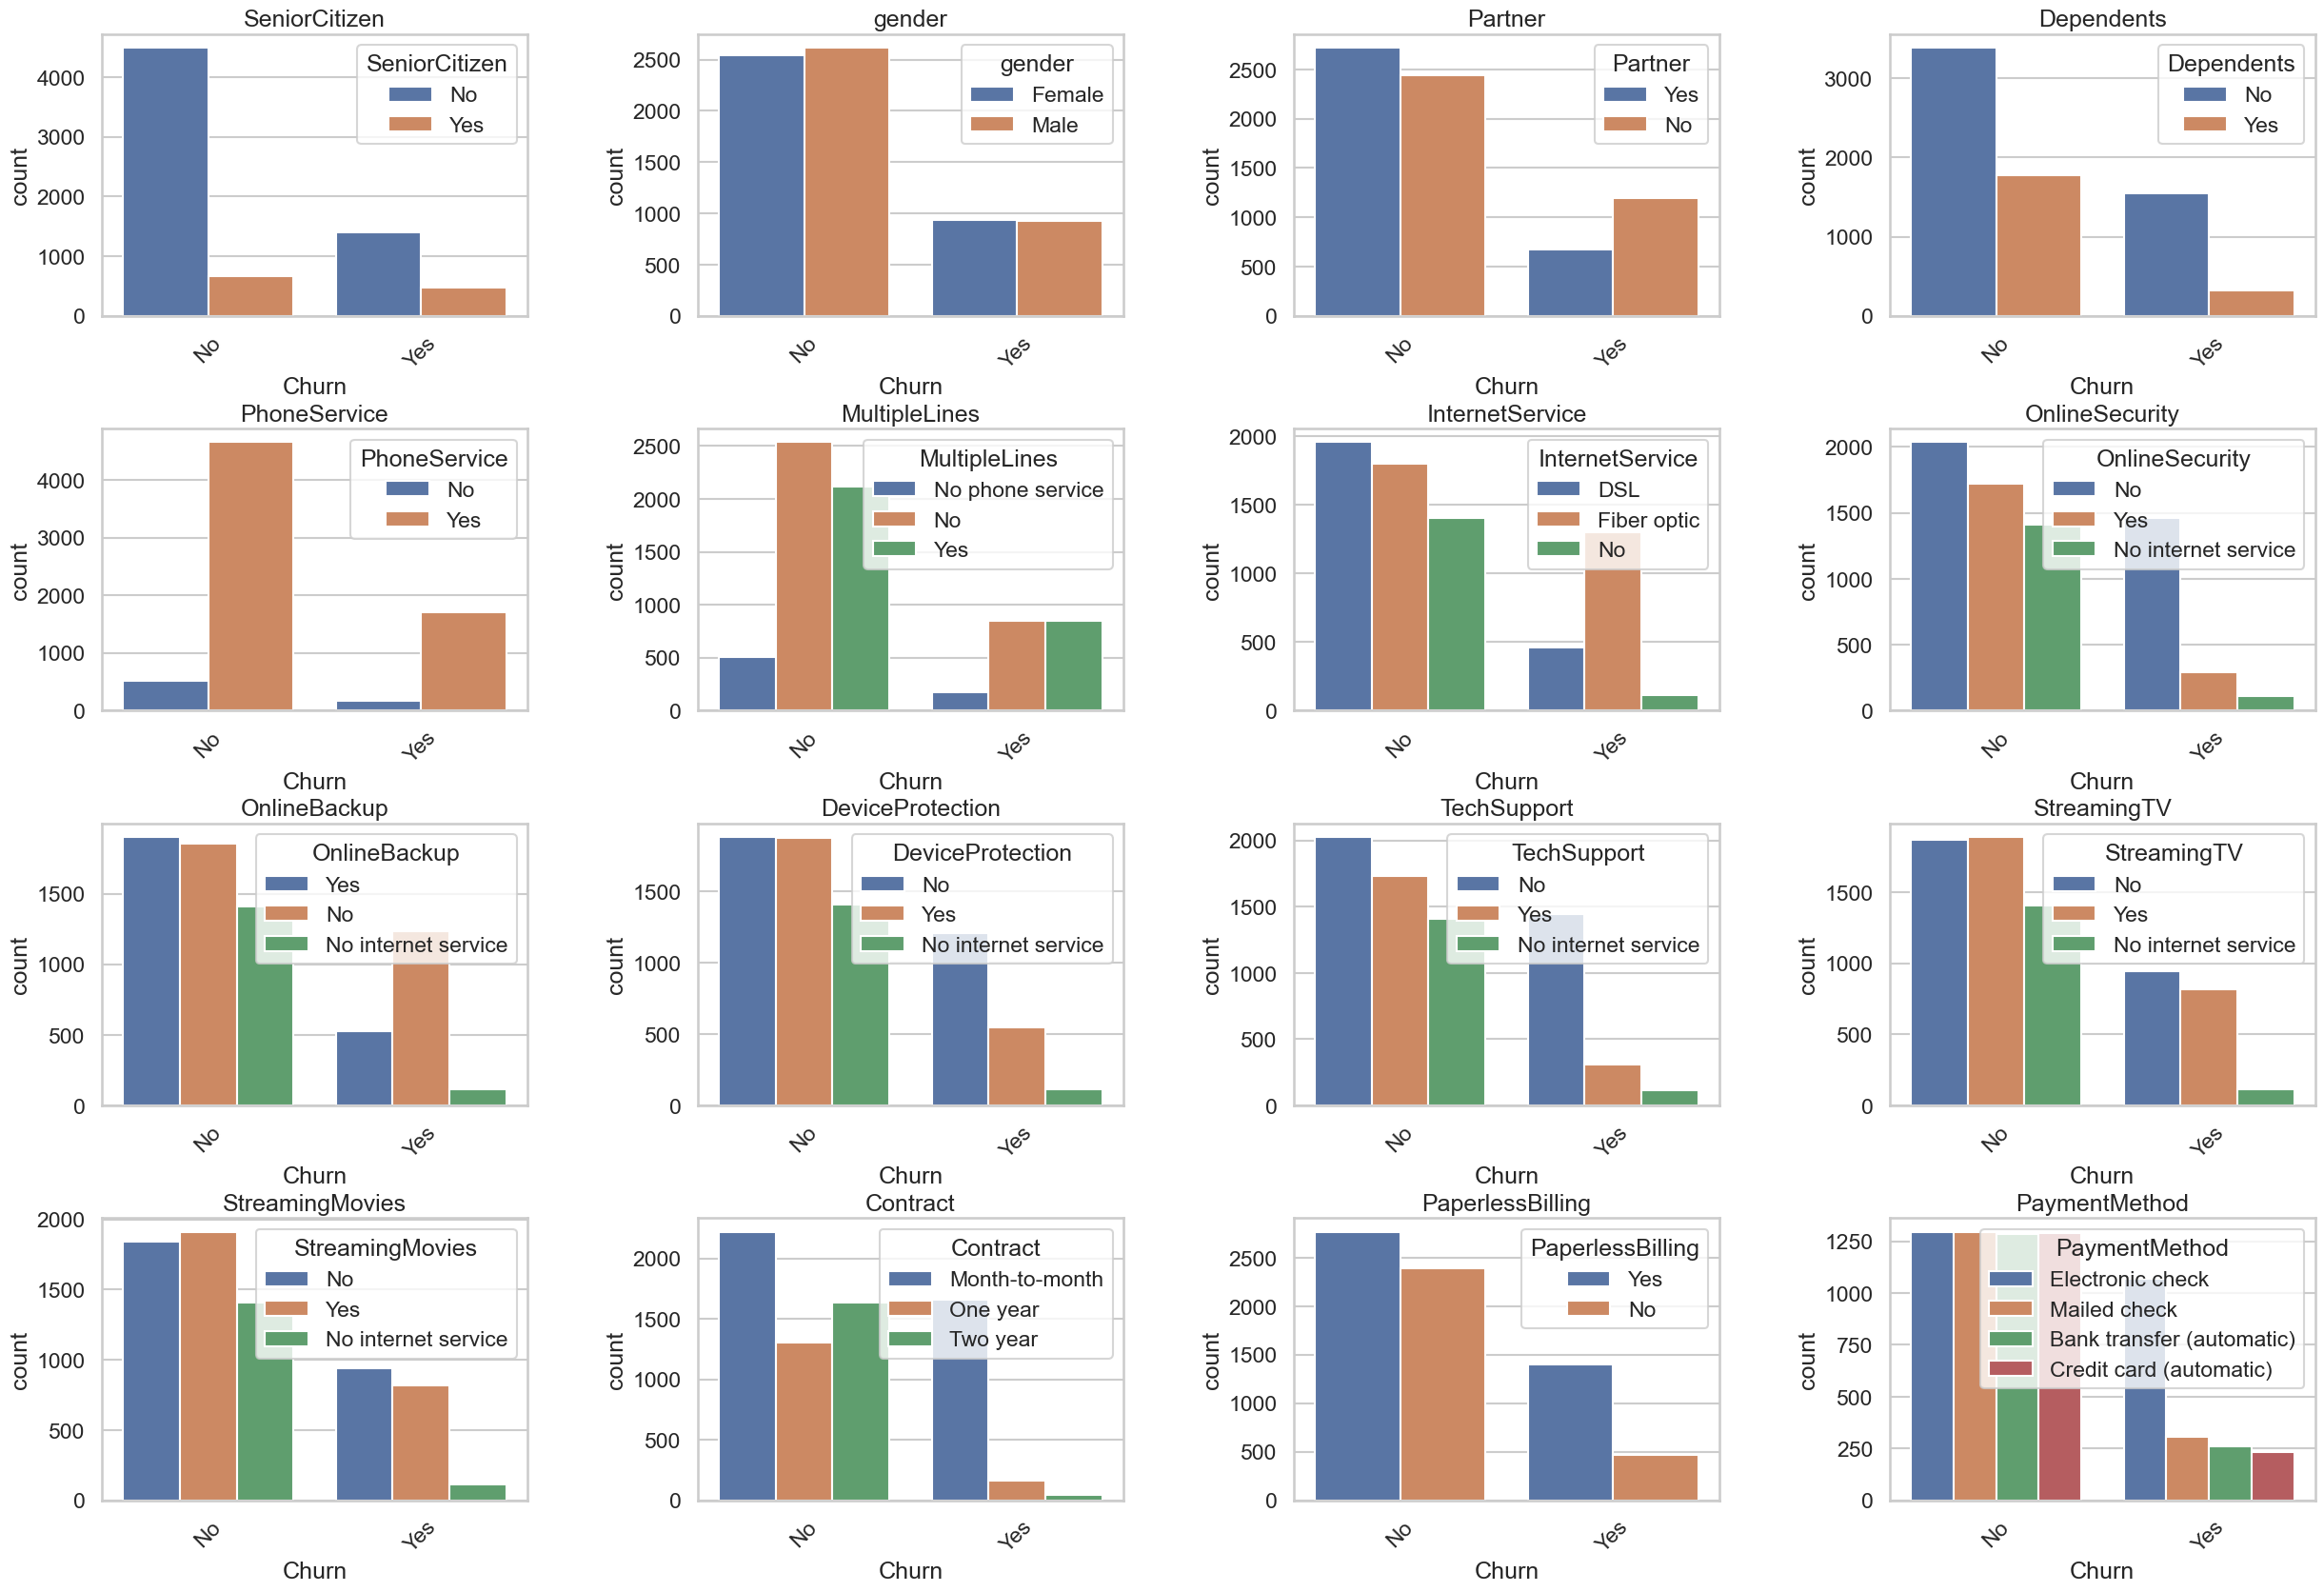

In [65]:
# Define the list of categorical variables
cat_vars = ["SeniorCitizen", "gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
           "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
           "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
           "PaperlessBilling", "PaymentMethod"]

# Define the number of rows and columns for the subplots
num_rows = 4
num_cols = 4

# Create subplots for each categorical variable
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 20))

# Flatten the axes array
axes = axes.flatten()

# Loop through the categorical variables and create countplots
for i, cat_var in enumerate(cat_vars):
    # Create a countplot for the current categorical variable
    sns.countplot(x='Churn', hue=cat_var, data=ch, ax=axes[i], order=['No', 'Yes'])
    axes[i].set_title(cat_var)
    axes[i].legend(title=cat_var, loc='upper right')
    axes[i].tick_params(axis='x', labelrotation=45)

# Remove empty subplots if any
for j in range(len(cat_vars), num_rows*num_cols):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Show the plots
plt.show()



# Observations:

- Senior citizens have a higher churn rate than non-seniors.
- Gender does not seem to have a strong influence on churn rate.
- Customers with partners have a lower churn rate than those without.
- Customers with dependents have a lower churn rate than those without.
- Customers with phone service have a similar churn rate to those without.
- Customers with multiple lines have a similar churn rate to those without.
- Customers with fiber optic internet service have a higher churn rate than those with DSL or no internet service.
- Customers without online security or backup have a higher churn rate than those with.
- Customers without device protection or tech support have a higher churn rate than those with.
- Customers with streaming TV or movies have a slightly higher churn rate than those without.
- Customers with shorter contract terms have a higher churn rate than those with longer terms.
- Customers with paperless billing have a higher churn rate than those without.
- Customers who pay with electronic check have a higher churn rate than those with other payment methods.







## NUMERICAL VS NUMERICAL

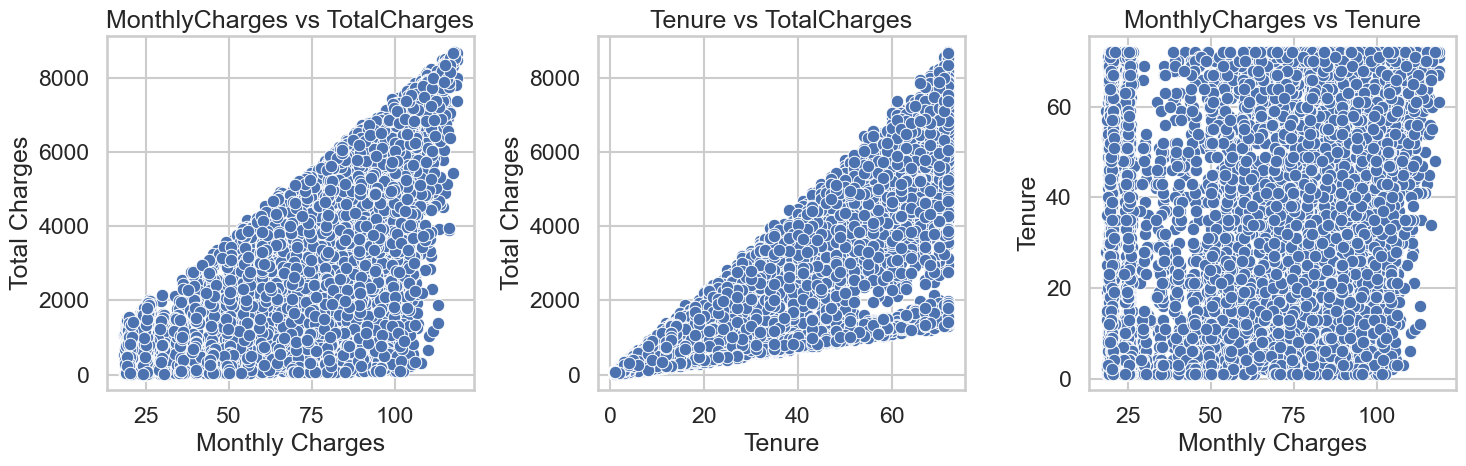

In [66]:
# Create subplots for scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot of MonthlyCharges vs TotalCharges
sns.scatterplot(x=ch["MonthlyCharges"], y=ch["TotalCharges"],ax=axes[0])
axes[0].set_title("MonthlyCharges vs TotalCharges")
axes[0].set_xlabel("Monthly Charges")
axes[0].set_ylabel("Total Charges")

# Scatter plot of tenure vs TotalCharges
sns.scatterplot(x=ch["tenure"], y=ch["TotalCharges"], ax=axes[1])
axes[1].set_title("Tenure vs TotalCharges")
axes[1].set_xlabel("Tenure")
axes[1].set_ylabel("Total Charges")

# Scatter plot of MonthlyCharges vs tenure
sns.scatterplot(x=ch["MonthlyCharges"], y=ch["tenure"], ax=axes[2])
axes[2].set_title("MonthlyCharges vs Tenure")
axes[2].set_xlabel("Monthly Charges")
axes[2].set_ylabel("Tenure")

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()


# Observation:

- The scatter plot of MonthlyCharges vs TotalCharges shows a positive correlation between these two variables, which means that as MonthlyCharges increase, TotalCharges also tend to increase.

- The scatter plot of tenure vs TotalCharges shows that there is a positive correlation between these two variables, which means that as tenure increases, TotalCharges also tend to increase.

- The scatter plot of MonthlyCharges vs tenure shows no clear correlation between these two variables, as the data points are scattered throughout the plot.

# MULTIVARIATE ANALYSIS

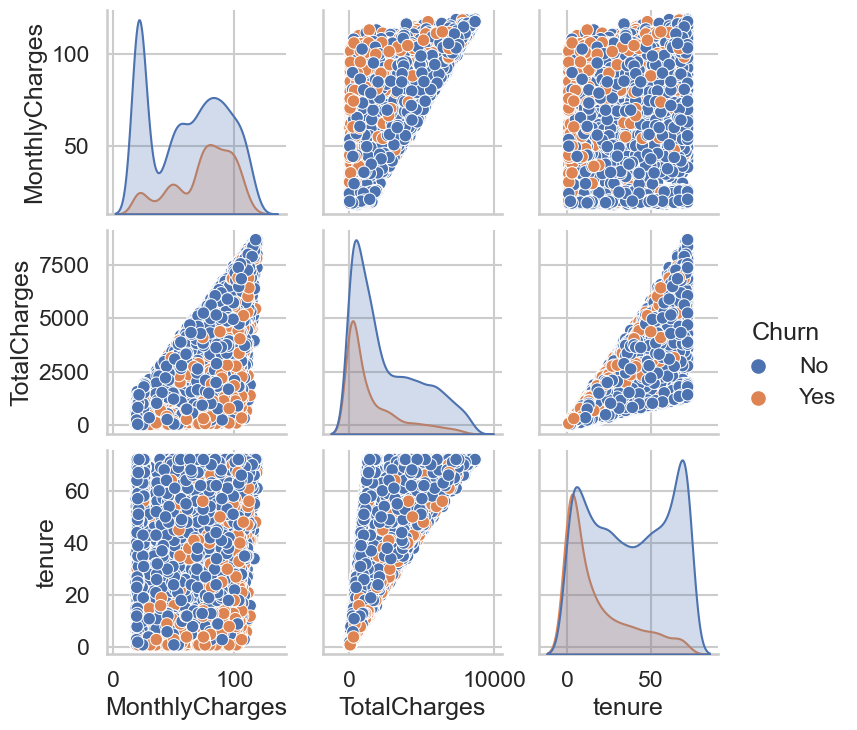

In [67]:
# Create a pairplot with hue based on Churn status
sns.pairplot(data=ch, vars=['MonthlyCharges', 'TotalCharges', 'tenure'], hue='Churn')
plt.show()


# Observation:

- Customers with higher MonthlyCharges tend to have shorter tenure and higher TotalCharges, which suggests that they might have signed up for more expensive services or added more features to their plans.

- Customers who churned tend to have lower tenure and higher MonthlyCharges, compared to those who did not churn.

- There is a strong positive correlation between TotalCharges and tenure, indicating that the longer a customer stays with the company, the more they tend to spend.

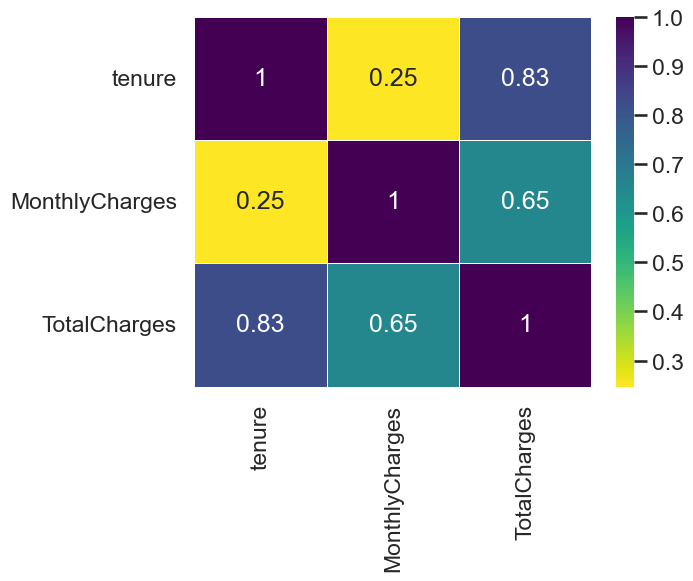

In [68]:
# Create a heatmap to visualize the correlation between numerical variables
corr = ch.corr()
sns.heatmap(corr, cmap='viridis_r', annot=True,linewidth=0.5,linecolor="white")
plt.show()


# Observations:

- There is a strong positive correlation (0.83) between TotalCharges and tenure, indicating that customers who have been with the company longer tend to have higher total charges.
- There is a moderate positive correlation (0.65) between MonthlyCharges and TotalCharges, indicating that customers who have higher monthly charges tend to have higher total charges.
- There is a weak correlation (0.25) between tenure and MonthlyCharges, indicating that there is no significant relationship between these variables.

In [82]:
tt = ch.groupby(["InternetService", "tenure", "Churn"])[["TotalCharges"]].sum()


<AxesSubplot:xlabel='InternetService', ylabel='TotalCharges'>

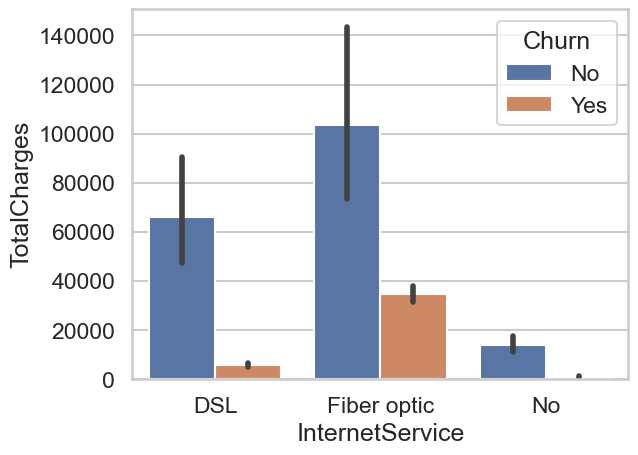

In [83]:
sns.barplot(x="InternetService", y="TotalCharges", hue="Churn", data=tt.reset_index())


In [79]:
ch.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')